In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import matplotlib.dates as mdates

%matplotlib notebook

## Questões iniciais:
- Preços no combustível no estado do RS por mês / ano

In [2]:
df = pd.read_csv('datasets/2004-2019.tsv', sep='\t', index_col=0)

In [3]:
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


## Data Cleansing

- 1m<sup>3</sup> == 1000L

- R$/m<sup>3</sup>: Unidade de medida do GNV

- R$/l: unidade de medida da gasolina

In [4]:
df.dtypes

DATA INICIAL                      object
DATA FINAL                        object
REGIÃO                            object
ESTADO                            object
PRODUTO                           object
NÚMERO DE POSTOS PESQUISADOS       int64
UNIDADE DE MEDIDA                 object
PREÇO MÉDIO REVENDA              float64
DESVIO PADRÃO REVENDA            float64
PREÇO MÍNIMO REVENDA             float64
PREÇO MÁXIMO REVENDA             float64
MARGEM MÉDIA REVENDA              object
COEF DE VARIAÇÃO REVENDA         float64
PREÇO MÉDIO DISTRIBUIÇÃO          object
DESVIO PADRÃO DISTRIBUIÇÃO        object
PREÇO MÍNIMO DISTRIBUIÇÃO         object
PREÇO MÁXIMO DISTRIBUIÇÃO         object
COEF DE VARIAÇÃO DISTRIBUIÇÃO     object
MÊS                                int64
ANO                                int64
dtype: object

In [5]:
# dropping unused columns
df.drop(['NÚMERO DE POSTOS PESQUISADOS', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO', \
        'COEF DE VARIAÇÃO REVENDA'], axis=1, inplace=True)

# formatting date values to datetime format
for column in df.columns[0:2]:
    df[column] = pd.to_datetime(df[column])

## Data Analysis

In [6]:
gas_rs = df[(df['ESTADO'] == 'RIO GRANDE DO SUL') & (df['PRODUTO'] == 'GASOLINA COMUM')]
gas_rs = gas_rs.sort_values(by='DATA INICIAL')
gas_rs = gas_rs[(gas_rs['ANO'] != 2004) & (gas_rs['ANO'] != 2019)]
gas_rs.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,MÊS,ANO
13007,2005-01-02,2005-01-08,SUL,RIO GRANDE DO SUL,GASOLINA COMUM,R$/l,2.469,0.074,2.300,2.74,0.379,2.09,0.052,1.969,2.414,1,2005
13034,2005-01-09,2005-01-15,SUL,RIO GRANDE DO SUL,GASOLINA COMUM,R$/l,2.466,0.075,2.280,2.74,0.375,2.091,0.049,1.969,2.414,1,2005
13061,2005-01-16,2005-01-22,SUL,RIO GRANDE DO SUL,GASOLINA COMUM,R$/l,2.464,0.076,2.249,2.74,0.377,2.087,0.051,1.95,2.421,1,2005
13088,2005-01-23,2005-01-29,SUL,RIO GRANDE DO SUL,GASOLINA COMUM,R$/l,2.461,0.076,2.310,2.74,0.374,2.087,0.049,1.965,2.4221,1,2005
13115,2005-01-30,2005-02-05,SUL,RIO GRANDE DO SUL,GASOLINA COMUM,R$/l,2.460,0.076,2.310,2.74,0.375,2.085,0.053,1.947,2.4221,1,2005


In [7]:
gas_rs = gas_rs.groupby(['ANO', 'MÊS']) \
               .agg(np.mean) \
               .drop(columns=['PREÇO MÁXIMO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA'])
gas_rs.head(20)

PREÇO MÉDIO REVENDA
ANO  MÊS                     
2005 1                2.46400
     2                2.44275
     3                2.40025
     4                2.57650
     5                2.51020
     6                2.53075
     7                2.54400
     8                2.52400
     9                2.69075
     10               2.75540
     11               2.71625
     12               2.72725
2006 1                2.70080
     2                2.71125
     3                2.73050
     4                2.76920
     5                2.75725
     6                2.72925
     7                2.73540
     8                2.74150

## Data Visualization

<IPython.core.display.Javascript object>


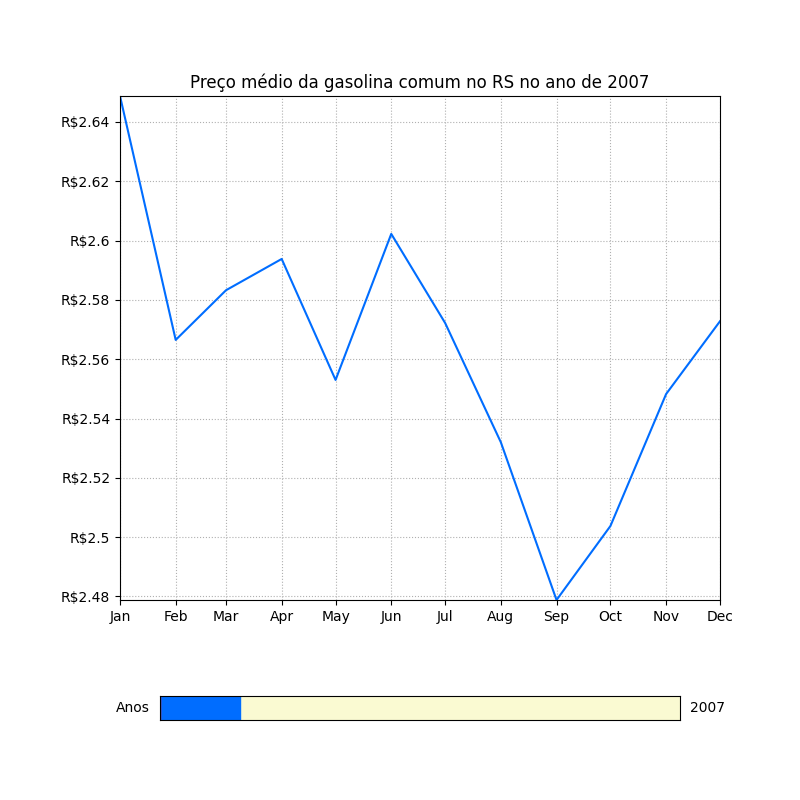

In [181]:
def change_year(val):
    ax.set_title(f'Preço médio da gasolina comum no RS no ano de {val}')
    data = gas_rs.loc[slider.val, 'PREÇO MÉDIO REVENDA'].values
    ax.set_ylim(min(data), max(data))
    plot.set_ydata(data)
    fig.canvas.draw_idle()
    
def format_func(value, tick_number):
    return "R$" + str(float(round(value, 2)))

def plot_settings(ax):
    ax.set_xlim((pd.to_datetime("2005-01"),pd.to_datetime("2005-12")))
    xlabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ylabels = []
    
    for ax in plt.gcf().get_axes():
        for label in ax.get_yticklabels():
            ylabels.append(label)
    
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    ax.set_xticklabels(xlabels, fontsize=10)

    ax.grid(linestyle='dotted')
    ax.set_title(f'Preço médio da Gasolina Comum no RS no ano de {year}')
    
# getting date range used as parameter to the x-axis 
date_range = list(map(pd.to_datetime, np.arange('2005-01','2006-01', dtype='datetime64')))

data = gas_rs.loc[year, 'PREÇO MÉDIO REVENDA'].values
fig, ax = plt.subplots(figsize=(8,8))
plt.subplots_adjust(left=0.15, bottom=0.25) # Make space for the slider

plot,  = plt.plot(date_range, data, '-', color='#006DFF')
plot_settings(plt.gca())

slider_ax = plt.axes([.2, .1, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider = Slider(slider_ax, 'Anos', valmin=2005, valmax=2018, valstep=1, valfmt='%.0f', color='#006DFF')
slider.on_changed(change_year)

plt.show()